### Belirlediğimiz kesit ile karşılaştırma yaparak eşleme işlemidir

In [13]:
import cv2
import numpy as np
import matplotlib .pyplot as plt
%matplotlib inline

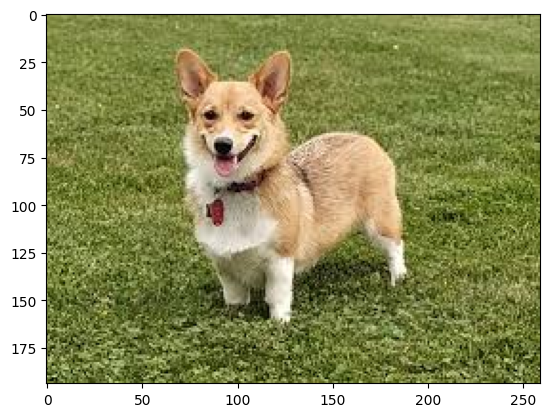

In [14]:
full=cv2.imread('input/dog.jpg')
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)

In [15]:
full.shape

(194, 259, 3)

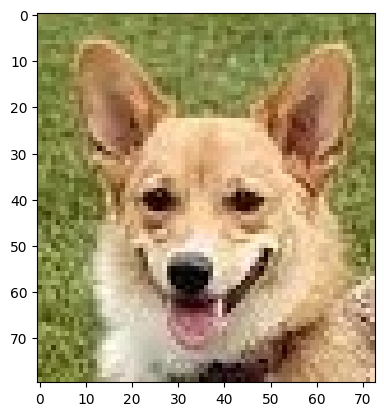

In [16]:
face=cv2.imread('input/dog_face.jpg')
face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [17]:
face.shape

(80, 73, 3)

In [18]:
height,width,channels=face.shape

## eval fonksiyonu knedisine verilen karakter dizisini değerlendirir ve bize sonuç döndürür

In [19]:
my_method=eval('cv2.TM_CCOEFF')
res=cv2.matchTemplate(full,face,my_method)

* eval('cv2.TM_CCOEFF'):<br>
    eval() fonksiyonu, bir metin dizesini Python koduna dönüştürmeye yarar. Yani 'cv2.TM_CCOEFF' dizesi, bir Python ifadesi olarak yorumlanır.<br>
    'cv2.TM_CCOEFF', OpenCV kütüphanesinde bulunan bir sabit olan cv2.TM_CCOEFF'i ifade eder. Bu, template eşleştirmesi için bir yöntemdir.<br>
    Bu ifade eval() ile işlenerek, string olarak temsil edilen cv2.TM_CCOEFF sabiti, gerçek cv2.TM_CCOEFF sabitiyle eşleştirilir ve my_method değişkenine atanır.<br><br>
* res = cv2.matchTemplate(full, face, my_method):<br>
    cv2.matchTemplate() işlevi, bir şablonun bir görüntü içindeki eşleşmelerini arar.<br>
    full değişkeni, arama yapılacak tam görüntüyü (ana görüntüyü) temsil eder.<br>
    face değişkeni, tam görüntüde aranacak olan şablonu temsil eder.<br>
    my_method değişkeni, kullanılacak template eşleştirme yöntemini belirler. Yani, bu metodun cv2.TM_CCOEFF olması durumunda, çapraz korelasyon katsayısını kullanarak eşleşmeleri hesaplar.<br>
    Sonuç, res değişkenine atanır. Bu sonuç, tam görüntüdeki şablonun yerini ve benzerlik derecesini gösteren bir matristir.<br>

Bu kod parçası, template eşleştirmesi yapmak için kullanılan bir yöntemi kullanarak, bir resimde belirli bir modelin benzerliklerini arar. Template eşleştirmesi, görüntü işleme ve bilgisayarlı görü yetenekleri gerektiren birçok uygulama için önemlidir. Bu örnekte, yüz tespiti gibi bir işlem için kullanılabilir.

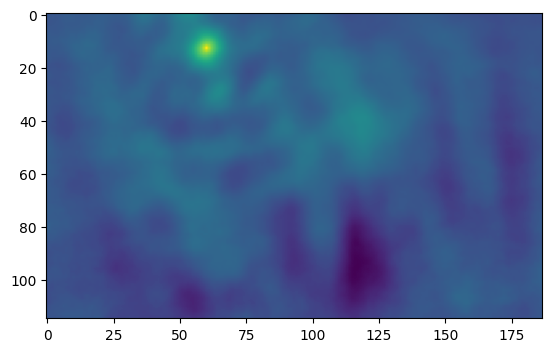

In [20]:
plt.imshow(res) # eşleme değerinin başladığı koordinat

In [21]:
# methodları deneyip hangisinin ne kadar başarılı oldupunu göreceğiz
# Fotoğrafın tamamı
full=cv2.imread('input/dog.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# Fotoğrafın sadece yüz kısmı
face= cv2.imread('input/dog_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# Comparison işlemi için metodlarımızı bir listede tutuyoruz.
# Biraz sonra string olarak tuttuğumuz bu metodları eval() fonksiyonun içine göndereceğiz.
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

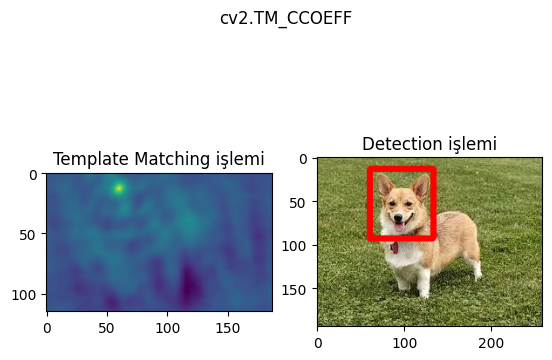

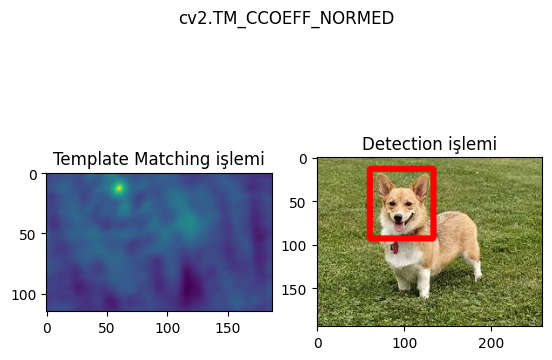

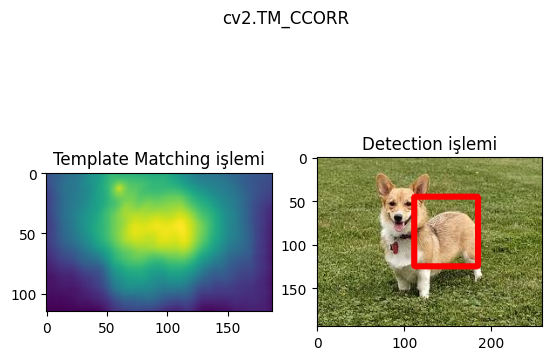

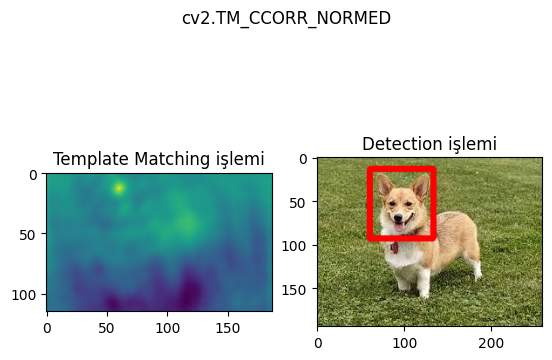

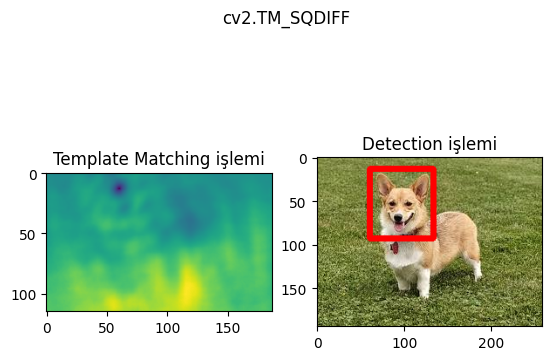

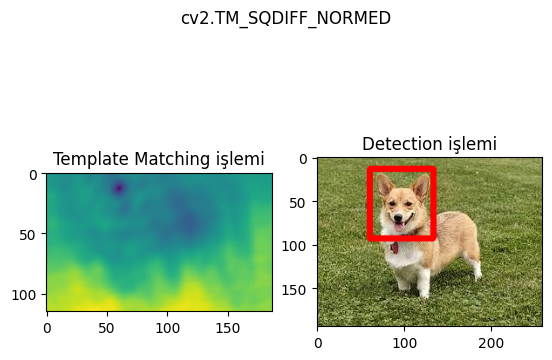

In [22]:
for m in methods:
    
    # Fotoğrafımızın bir kopyasını alıyoruz
    full_copy = full.copy()
    
    # string olarak tanımladığımız fonksiyonları evale gönderiyoruz
    method = eval(m)

    # Metodumuzla birlikte eşleme işleminin gerçekleştirilmesi
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Konum
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Dikdörtgen çizme işlemi
    # -----------------------
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # sağ alt için koordinat belirle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Kırmızı renkli dikdörtgen çizimi
    cv2.rectangle(full_copy,top_left, bottom_right, (255,0,0), 5)

    # Ekrana basma işlemi
    plt.subplot(121) # sol tarafta olacak işlem diyoruz
    plt.imshow(res)
    plt.title('Template Matching işlemi')
    
    plt.subplot(122) # sol tarafta olacak işlem diyoruz
    plt.imshow(full_copy)
    plt.title('Detection işlemi')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')

## Yukarıdaki kodun açıklaması
İlk satır bir döngü başlatıyor. Bu döngü, methods adlı bir iterable üzerinde dönüyor.<br>
Her döngü adımında, orijinal görüntünün bir kopyası alınıyor. Bunu full adlı bir görüntüden kopyalıyoruz ve full_copy adlı bir değişkene atıyoruz.<br>
eval() fonksiyonu, string olarak tanımlanmış bir fonksiyonu çalıştırmak için kullanılır. Burada, döngüdeki mevcut yöntemi (m) bir string olarak alırız ve bu stringi eval() ile bir Python fonksiyonuna dönüştürüp method adlı bir değişkene atarız.<br>
Ardından, bu yöntemi kullanarak, cv2.matchTemplate() fonksiyonu aracılığıyla bir template eşleme işlemi gerçekleştirilir. Bu fonksiyon, bir görüntüde bir şablonun benzerliklerini bulmaya yarar.<br>
Eşleme işlemi sonucu, res adlı bir değişkene atanır.<br>
cv2.minMaxLoc() fonksiyonu, eşleme sonucunun en küçük ve en büyük değerlerini, ve bu değerlerin konumlarını (min_val, max_val, min_loc, max_loc) döndürür.<br>
Ardından, hangi eşleme yöntemi kullanıldığına bağlı olarak, top_left ve bottom_right noktaları belirlenir. Bu noktalar, dikdörtgenin sol üst ve sağ alt köşelerinin koordinatlarını temsil eder.<br>
cv2.rectangle() fonksiyonu kullanılarak, bu belirlenen koordinatlar arasında kalan alana bir dikdörtgen çizilir. Dikdörtgen, full_copy adlı kopyalanmış görüntü üzerine çizilir.<br>
plt.subplot() ve plt.imshow() gibi matplotlib fonksiyonları kullanılarak, eşleme işleminin sonucu (res) ve dikdörtgen çizilmiş görüntü (full_copy) ekrana çizdirilir.<br>
plt.show() ile çizdirilen grafikler görüntülenir.<br>
Son olarak, her döngü adımının sonunda birkaç boş satır ve başlık yazdırılır.<br>